In [5]:
using DrWatson
@quickactivate "sst-mot-analysis"

import DrWatson: datadir, srcdir, plotsdir
!isdir(plotsdir()) && mkpath(plotsdir()) 
include(srcdir("compare_random_samples.jl"))
include(srcdir("TMI_utils.jl"))

using GH19, TMI, PythonCall, Revise

 takes about 10 minutes
Theta_OPT-0015.nc already downloaded; use `force=true` to re-download
Theta_anom_OPT-0015.nc already downloaded; use `force=true` to re-download


In [2]:
N_sample = 25
Nboot = 1000

1000

### Spherical Sampling Results

In [3]:
spherical_sampl_results  = bootstrap_PI_lgm_differences(N_sample, Nboot; sampling_method=:spherical);

Form water-mass matrix A
  0.253059 seconds (639.87 k allocations: 67.593 MiB, 4.04% gc time, 89.02% compilation time)
LU factorization of A
  0.678510 seconds (586.65 k allocations: 534.653 MiB, 1.47% gc time, 12.17% compilation time)
circulation matrix L=
  0.101517 seconds (83.34 k allocations: 4.410 MiB, 98.05% compilation time)
Boundary matrix B=
  0.022479 seconds (15.98 k allocations: 828.055 KiB, 93.30% compilation time)
Form water-mass matrix A
  0.073585 seconds (35.62 k allocations: 128.228 MiB, 12.86% gc time, 26.81% compilation time)
LU factorization of A
  4.582047 seconds (253 allocations: 2.810 GiB, 1.51% gc time, 0.08% compilation time)
circulation matrix L=
  0.216416 seconds (8.35 M allocations: 235.400 MiB, 6.46% gc time, 39.34% compilation time)
Boundary matrix B=
  0.015587 seconds (6.19 k allocations: 7.271 MiB, 20.99% compilation time)
Form water-mass matrix A
  0.033872 seconds (5.23 k allocations: 118.943 MiB, 12.80% gc time)
LU factorization of A
  4.622049 s

Running 1000 MC trials (n=25).. 100%|████████████████████| Time: 0:01:00


dSST-TMI: 2.019904885922717
dMOT-TMI: 2.1046314559917327


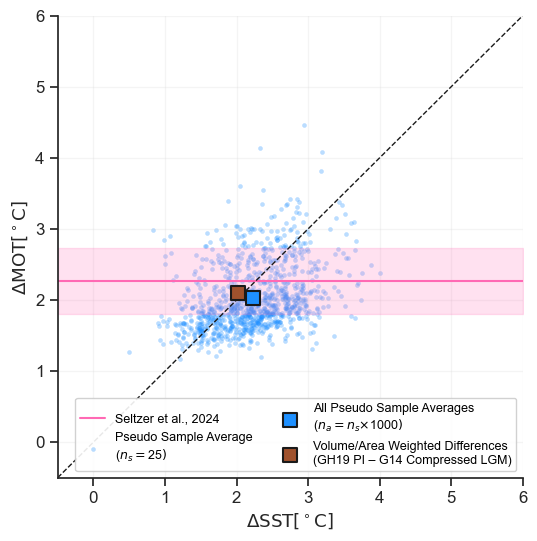

(<py Figure size 600x600 with 1 Axes>, <py Axes: xlabel='$\\Delta \\text{SST}$$[^\\circ \\text{C}]$', ylabel='$\\Delta \\text{MOT}$$[^\\circ \\text{C}]$'>)

In [6]:
generate_temperature_difference_plot(
    spherical_sampl_results,
    :spherical, N_sample, Nboot, plotsdir("1.LGM_PI_Temp_diff_weighted_spherical_sampled.png")
)